# 🧾 Financial Health Analysis for Retail Stores

This Analysis explores the financial performance of 3 retail stores over a 12-month period.
We analyse revenue trends, profit margins, and operational costs using Python and pandas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Define the file path
file_path = r'C:\Users\THANDO\Desktop\DataPortfolio\FinancialDashboard\data\retail_financials.xlsx'

# Read the file into a DataFrame
df = pd.read_excel(file_path)

# Display the first 5 rows
print(df.head())

     Store    Month  Revenue    COGS  Operating_Expenses  Taxes  Net_Profit
0  Store A  2023-01   321958  180073               70297  17897       53691
1  Store A  2023-02   319879  166251               68966  21165       63497
2  Store A  2023-03   287498  164803               74781  11978       35936
3  Store A  2023-04   478167  253513               98330  31581       94743
4  Store A  2023-05   394027  231573               78836  20904       62714


**Summary Statistics**

In [3]:
df.describe()

,Revenue,COGS,Operating_Expenses,Taxes,Net_Profit
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,365689.861111,188185.000000,90318.500000,21796.194444,65390.166667
std,87167.792420,56061.639249,25135.556934,7074.288345,21222.762429
min,211534.000000,88357.000000,45385.000000,7805.000000,23418.000000
25%,302217.750000,150040.500000,69515.250000,16069.500000,48209.250000
50%,352029.000000,182064.500000,91053.500000,20932.500000,62799.500000
75%,450622.500000,227043.000000,115190.000000,26533.000000,79600.500000
max,497366.000000,281301.000000,134716.000000,39331.000000,117995.000000


***Check missing values***

In [4]:
df.isnull().sum()

Store                 0
Month                 0
Revenue               0
COGS                  0
Operating_Expenses    0
Taxes                 0
Net_Profit            0
dtype: int64

***Calculate profit margin (%) for each row***

In [5]:
df['Profit_Margin'] = (df['Net_Profit'] / df['Revenue']) * 100
df.head()


,Store,Month,Revenue,COGS,Operating_Expenses,Taxes,Net_Profit,Profit_Margin
0,Store A,2023-01,321958,180073,70297,17897,53691,16.676399
1,Store A,2023-02,319879,166251,68966,21165,63497,19.850318
2,Store A,2023-03,287498,164803,74781,11978,35936,12.499565
3,Store A,2023-04,478167,253513,98330,31581,94743,19.813789
4,Store A,2023-05,394027,231573,78836,20904,62714,15.916168


***Summary stats of profit margin by store***

In [6]:
df.groupby('Store') ['Profit_Margin'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
Store A,12.0,19.505533,4.622596,11.998826,16.486341,19.832054,23.153489,25.718458
Store B,12.0,18.234025,6.344639,9.196511,13.556984,19.187547,24.351386,27.203192
Store C,12.0,17.156127,5.541033,9.405424,13.517105,14.852790,19.922488,28.146666


***Average operating expenses as % of rev by store***

In [7]:
df['Op_Expenses_Pct'] = (df['Operating_Expenses'] / df['Revenue']) * 100
df.groupby('Store')['Op_Expenses_Pct'].mean()

Store
Store A    24.194163
Store B    24.605500
Store C    25.018644
Name: Op_Expenses_Pct, dtype: float64

***Total taxes paid by store***

In [8]:
df.groupby('Store')['Taxes'].sum()

Store
Store A    284212
Store B    256984
Store C    243467
Name: Taxes, dtype: int64

***Basic correlation matrix***

In [10]:
df.corr(numeric_only=True)


,Revenue,COGS,Operating_Expenses,Taxes,Net_Profit,Profit_Margin,Op_Expenses_Pct
Revenue,1.000000,0.912055,0.916013,0.459841,0.459834,-0.328907,0.144488
COGS,0.912055,1.000000,0.835897,0.085862,0.085854,-0.641118,0.139764
Operating_Expenses,0.916013,0.835897,1.000000,0.277402,0.277396,-0.450531,0.518281
Taxes,0.459841,0.085862,0.277402,1.000000,1.000000,0.657180,-0.292183
Net_Profit,0.459834,0.085854,0.277396,1.000000,1.000000,0.657186,-0.292187
Profit_Margin,-0.328907,-0.641118,-0.450531,0.657180,0.657186,1.000000,-0.454335
Op_Expenses_Pct,0.144488,0.139764,0.518281,-0.292183,-0.292187,-0.454335,1.000000


*VISUALIZATIONS*

****Revenue Trends****

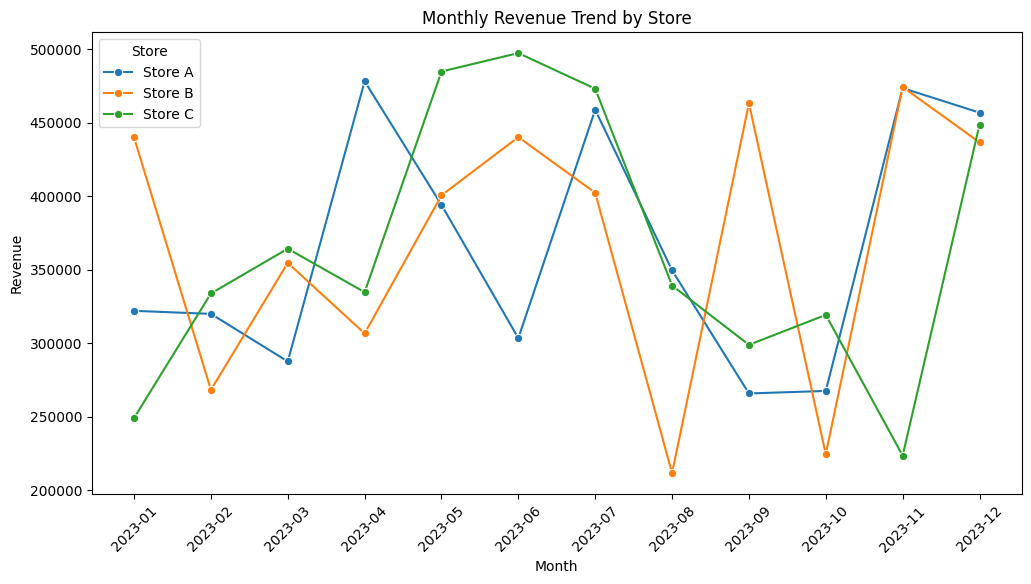

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Revenue', hue='Store', marker='o')
plt.title('Monthly Revenue Trend by Store')
plt.xticks(rotation=45)
plt.show()

****2.Profit Margin Distribution****

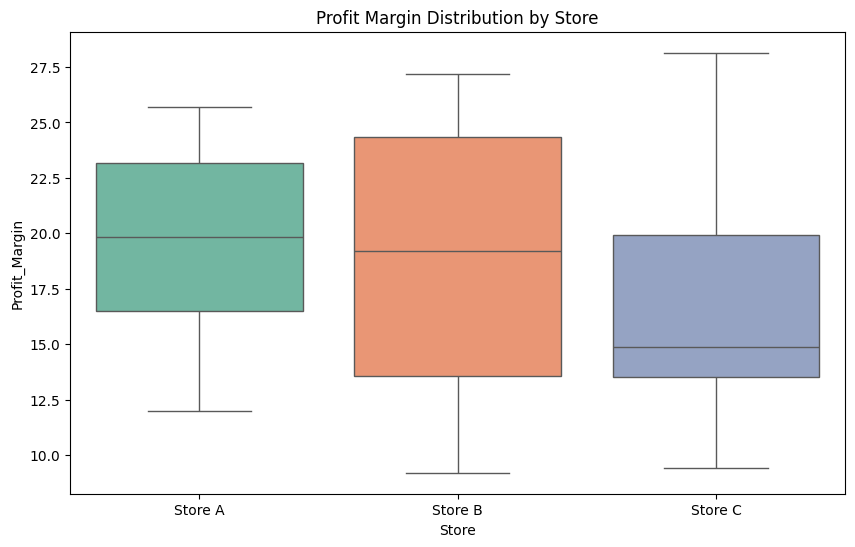

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Store', y='Profit_Margin', hue='Store', palette='Set2', legend=False)
plt.title('Profit Margin Distribution by Store')
plt.show()

****Expense % Bar Chart****

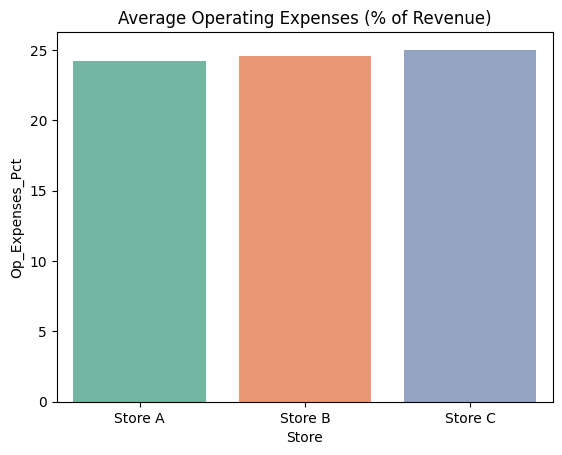

In [18]:
avg_op_exp = df.groupby('Store')['Op_Expenses_Pct'].mean().reset_index()
sns.barplot(data=avg_op_exp, x='Store', y='Op_Expenses_Pct', hue='Store', palette='Set2', legend=False)
plt.title('Average Operating Expenses (% of Revenue)')
plt.show()

****Correlation Heatmap****

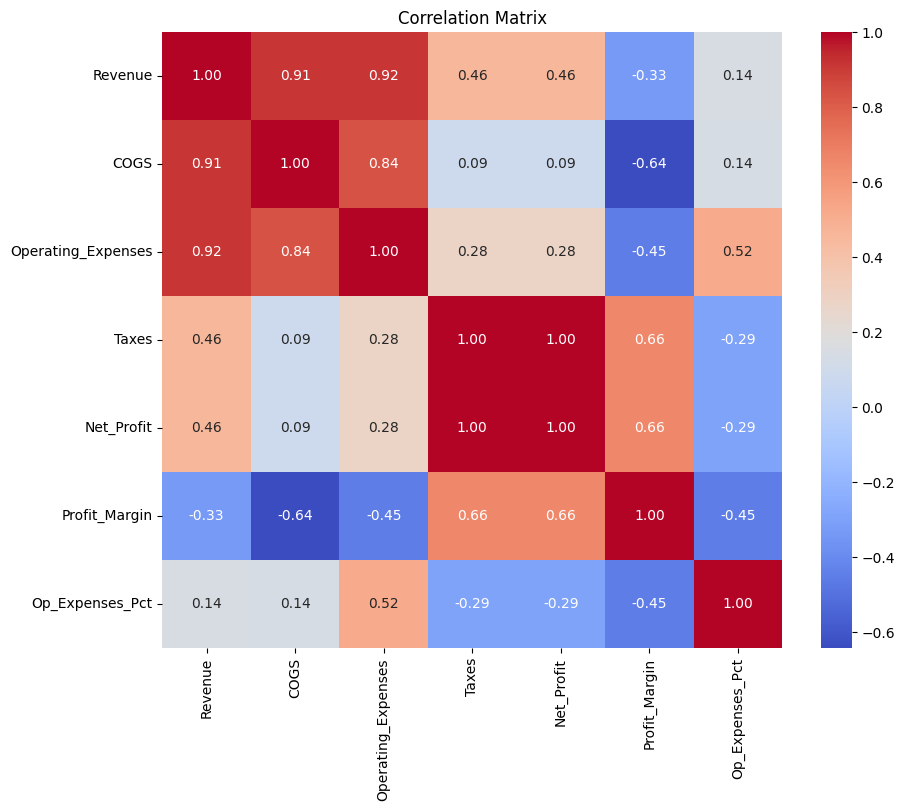

In [15]:
# Prepare data for regression analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 📌 Key Insights

- Store B consistently has higher profit margins than Store A & Store C.

- Operating expenses are fairly stable as a % of revenue, averaging around 25%.

- Revenue and net profit are strongly correlated (as expected).


# ✅ Conclusion

This analysis highlights profitability differences between stores and offers a  foundation for improving financial health across locations. Next steps could include forecasting, or building a dashboard in Power BI.

